## Regression:

**(a) Define and explain linear regression.**
* Linear regression is a statistical technique used to model and analyze the relationship between a dependent variable and one or more independent variables. It fits a linear equation, 

  y=mx+b,

  where, 
        m represents the slope and
        b the intercept, to the observed data.
  
* The main goal of linear regression is to minimize the sum of squared residuals, which are the differences between actual and predicted values. This approach is widely used for predicting continuous variables, such as house prices or sales figures. Additionally, linear regression provides insights into the strength and direction of relationships between variables.

**(b) Define and explain logistic regression.**
* Logistic regression is a machine learning algorithm used for predicting categorical outcomes, commonly for binary classification tasks (e.g., success/failure, 0/1). Unlike linear regression, it estimates the probability that a given input belongs to a particular class by applying the logistic (Sigmoid) function. The Sigmoid function ensures that predictions are constrained between 0 and 1, allowing them to be interpreted as probabilities. Logistic regression is widely used in applications like customer churn prediction, spam detection, and medical diagnosis. It provides a threshold-based classification, where probabilities above a specified value (e.g., 0.5) are classified into one category, and those below into another.

**(c) How are they similar and how are they different?**
* Linear regression and logistic regression share similarities in their foundation, as both aim to model relationships between variables using weights for input features. However, their applications differ significantly. Linear regression predicts continuous numeric values, whereas logistic regression predicts probabilities for classification tasks. Logistic regression applies the Sigmoid function to constrain its predictions to a range between 0 and 1, while linear regression directly outputs real-valued predictions. Additionally, linear regression minimizes the sum of squared errors as its objective function, whereas logistic regression uses maximum likelihood estimation to optimize its parameters.

**(d) Does logistic regression use the Sigmoid function? Explain.**
* Yes, logistic regression uses the Sigmoid function as a core component of its model. The Sigmoid function transforms the linear combination of inputs and weights into probabilities ranging from 0 to 1. It is defined as 

  σ(x)= 1/(1+e−x)
   where x is the linear output.

* This probabilistic mapping allows logistic regression to classify inputs by setting a threshold, often 0.5, to determine the predicted class. By using the Sigmoid function, logistic regression becomes suitable for classification tasks, enabling clear decision boundaries.

**(e) Explain how maximum likelihood is connected to logistic regression.**
* Maximum likelihood estimation (MLE) is the optimization technique used in logistic regression to determine the best-fitting parameters. It works by maximizing the likelihood that the observed data were generated by the logistic model. The likelihood function represents the probability of the observed labels given the predicted probabilities, and MLE adjusts the model's weights to maximize this value. This approach ensures that the predicted probabilities closely align with the actual outcomes. Logistic regression often uses numerical optimization methods like gradient descent to solve the MLE problem efficiently.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment/Assignment 1/Iterating code/Train_Preprocessed.csv')

In [3]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,809.98,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good


##### Discretizing the numeric columns for better modelling on the data.

In [4]:
# Annual Income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, float('inf')]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k+']
df['Income_Binned'] = pd.cut(df['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Delay from Due Date
delay_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 75]
delay_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-39', '40-49', '50-59', '60+']
df['Delay_Binned'] = pd.cut(df['Delay_from_due_date'], bins=delay_bins, labels=delay_labels, right=False)

# Number of Delayed Payments
delayed_payment_bins = [0, 2, 5, 8, 10, 12, 15, 20, 30]
delayed_payment_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15-19', '20+']
df['Num_Delayed_Payment_Binned'] = pd.cut(df['Num_of_Delayed_Payment'], bins=delayed_payment_bins, labels=delayed_payment_labels, right=False)

# Changed Credit Limit
credit_limit_bins = [-float('inf'), -10, 0, 5, 10, 15, 20, 25, float('inf')]
credit_limit_labels = ['< -10', '-10 to 0', '0-4', '5-9', '10-14', '15-19', '20-24', '25+']
df['Changed_Credit_Limit_Binned'] = pd.cut(df['Changed_Credit_Limit'], bins=credit_limit_bins, labels=credit_limit_labels, right=False)

# Number of Credit Inquiries
inquiries_bins = [0, 2, 5, 8, 10, 12, 15, float('inf')]
inquiries_labels = ['0-1', '2-4', '5-7', '8-9', '10-11', '12-14', '15+']
df['Num_Credit_Inquiries_Binned'] = pd.cut(df['Num_Credit_Inquiries'], bins=inquiries_bins, labels=inquiries_labels, right=False)

# Outstanding Debt
debt_bins = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]
debt_labels = ['0-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000+']
df['Outstanding_Debt_Binned'] = pd.cut(df['Outstanding_Debt'], bins=debt_bins, labels=debt_labels, right=False)

# Credit Utilization Ratio
util_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, float('inf')]
util_labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45+']
df['Credit_Utilization_Ratio_Binned'] = pd.cut(df['Credit_Utilization_Ratio'], bins=util_bins, labels=util_labels, right=False)

# Credit History Age
history_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
history_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400+']
df['Credit_History_Age_Binned'] = pd.cut(df['Credit_History_Age'], bins=history_bins, labels=history_labels, right=False)

# Total EMI per Month
emi_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, float('inf')]
emi_labels = ['0-24', '25-49', '50-74', '75-99', '100-124', '125-149', '150-174', '175-199', '200-224', '225-249', '250+']
df['Total_EMI_per_month_Binned'] = pd.cut(df['Total_EMI_per_month'], bins=emi_bins, labels=emi_labels, right=False)

# Amount Invested Monthly
invest_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
invest_labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499', '500+']
df['Amount_invested_monthly_Binned'] = pd.cut(df['Amount_invested_monthly'], bins=invest_bins, labels=invest_labels, right=False)

# Monthly Balance
balance_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, float('inf')]
balance_labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900+']
df['Monthly_Balance_Binned'] = pd.cut(df['Monthly_Balance'], bins=balance_bins, labels=balance_labels, right=False)

# Age Binned
age_bins = [0, 12, 18, 24, 30, 35, 40, 45, 50, 60, float('inf')]
age_labels = ['0-11', '12-17', '18-23', '24-29', '30-34', '35-39', '40-44', '45-49', '50-59', '60+']
df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [5]:
# List of original columns to be dropped
columns_to_drop = [
    'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
    'Amount_invested_monthly', 'Monthly_Balance', 'Age'
]

# Drop these columns from the dataframe
df = df.drop(columns=columns_to_drop)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Month                            100000 non-null  object  
 1   Occupation                       100000 non-null  object  
 2   Num_Bank_Accounts                100000 non-null  float64 
 3   Num_Credit_Card                  100000 non-null  float64 
 4   Interest_Rate                    100000 non-null  int64   
 5   Num_of_Loan                      100000 non-null  int64   
 6   Type_of_Loan                     100000 non-null  object  
 7   Credit_Mix                       100000 non-null  object  
 8   Payment_of_Min_Amount            100000 non-null  object  
 9   Payment_Behaviour                100000 non-null  object  
 10  Unemployment_Rate                100000 non-null  float64 
 11  Credit_Score                     100000 non-null  obj

In [7]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

##### Filtering the dataset containing only Good and Poor credit score for modeling, making it Binary label data.

In [8]:
df1 = df[(df['Credit_Score'] == 'Good') | (df['Credit_Score'] == 'Poor')]

In [9]:
df1.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,...,Num_Delayed_Payment_Binned,Changed_Credit_Limit_Binned,Num_Credit_Inquiries_Binned,Outstanding_Debt_Binned,Credit_Utilization_Ratio_Binned,Credit_History_Age_Binned,Total_EMI_per_month_Binned,Amount_invested_monthly_Binned,Monthly_Balance_Binned,Age_Binned
0,2022-01-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Small_value_payments,...,5-7,10-14,2-4,0-999,25-29,250-299,25-49,50-99,300-399,18-23
1,2022-02-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Large_value_payments,...,5-7,10-14,2-4,0-999,30-34,250-299,25-49,100-149,200-299,18-23
2,2022-03-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Medium_value_payments,...,5-7,10-14,2-4,0-999,25-29,250-299,25-49,50-99,300-399,18-23
3,2022-04-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Small_value_payments,...,2-4,5-9,2-4,0-999,30-34,250-299,25-49,150-199,200-299,18-23
4,2022-05-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Medium_value_payments,...,5-7,10-14,2-4,0-999,20-24,250-299,25-49,0-49,300-399,18-23


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46826 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month                            46826 non-null  object  
 1   Occupation                       46826 non-null  object  
 2   Num_Bank_Accounts                46826 non-null  float64 
 3   Num_Credit_Card                  46826 non-null  float64 
 4   Interest_Rate                    46826 non-null  int64   
 5   Num_of_Loan                      46826 non-null  int64   
 6   Type_of_Loan                     46826 non-null  object  
 7   Credit_Mix                       46826 non-null  object  
 8   Payment_of_Min_Amount            46826 non-null  object  
 9   Payment_Behaviour                46826 non-null  object  
 10  Unemployment_Rate                46826 non-null  float64 
 11  Credit_Score                     46826 non-null  object  
 12  Income_Bi

In [11]:
df1['Credit_Score'].unique()

array(['Good', 'Poor'], dtype=object)

* We can see that the new df1 dataframe contains only binary class, which is **Good** and **Poor**.
* Now, splitting the Label **Credit_Score** from the df1 and storing it in y

In [12]:
y = df1['Credit_Score']
# Assign integer labels to the Credit_Score column
y = y.map({'Good': 0, 'Poor': 1})

df1 =  df1.drop(columns = ['Credit_Score'])

In [13]:
df1.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,...,Num_Delayed_Payment_Binned,Changed_Credit_Limit_Binned,Num_Credit_Inquiries_Binned,Outstanding_Debt_Binned,Credit_Utilization_Ratio_Binned,Credit_History_Age_Binned,Total_EMI_per_month_Binned,Amount_invested_monthly_Binned,Monthly_Balance_Binned,Age_Binned
0,2022-01-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Small_value_payments,...,5-7,10-14,2-4,0-999,25-29,250-299,25-49,50-99,300-399,18-23
1,2022-02-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Large_value_payments,...,5-7,10-14,2-4,0-999,30-34,250-299,25-49,100-149,200-299,18-23
2,2022-03-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Medium_value_payments,...,5-7,10-14,2-4,0-999,25-29,250-299,25-49,50-99,300-399,18-23
3,2022-04-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,Low_spent_Small_value_payments,...,2-4,5-9,2-4,0-999,30-34,250-299,25-49,150-199,200-299,18-23
4,2022-05-01,Scientist,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",Good,No,High_spent_Medium_value_payments,...,5-7,10-14,2-4,0-999,20-24,250-299,25-49,0-49,300-399,18-23


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int64

In [15]:
df1.nunique()

Month                                8
Occupation                          15
Num_Bank_Accounts                   24
Num_Credit_Card                     32
Interest_Rate                       34
Num_of_Loan                         10
Type_of_Loan                       508
Credit_Mix                           3
Payment_of_Min_Amount                2
Payment_Behaviour                    6
Unemployment_Rate                    5
Income_Binned                        8
Delay_Binned                        10
Num_Delayed_Payment_Binned           8
Changed_Credit_Limit_Binned          7
Num_Credit_Inquiries_Binned          7
Outstanding_Debt_Binned              5
Credit_Utilization_Ratio_Binned      6
Credit_History_Age_Binned            9
Total_EMI_per_month_Binned          11
Amount_invested_monthly_Binned      11
Monthly_Balance_Binned               8
Age_Binned                           8
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46826 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Month                            46826 non-null  object  
 1   Occupation                       46826 non-null  object  
 2   Num_Bank_Accounts                46826 non-null  float64 
 3   Num_Credit_Card                  46826 non-null  float64 
 4   Interest_Rate                    46826 non-null  int64   
 5   Num_of_Loan                      46826 non-null  int64   
 6   Type_of_Loan                     46826 non-null  object  
 7   Credit_Mix                       46826 non-null  object  
 8   Payment_of_Min_Amount            46826 non-null  object  
 9   Payment_Behaviour                46826 non-null  object  
 10  Unemployment_Rate                46826 non-null  float64 
 11  Income_Binned                    46826 non-null  category
 12  Delay_Bin

* Converting the categorical data to numerical data by performing one hot encoding.

In [17]:
df2 = pd.get_dummies(df1)  # Drop first to avoid dummy variable trap

In [18]:
# Get all categorical column names in df1
categorical_columns_df1 = df1.select_dtypes(include=['object', 'category']).columns

# Check if these columns exist in df2
existing_categorical_columns = [col for col in categorical_columns_df1 if col in df2.columns]

# Display the existing categorical columns in df2
print("Categorical columns from df1 that exist in df2:", existing_categorical_columns)

Categorical columns from df1 that exist in df2: []


* It can be observed that the the orginal categorical columns are removed and have only the encoded columns.

In [19]:
df2.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Unemployment_Rate,Month_2022-01-01,Month_2022-02-01,Month_2022-03-01,Month_2022-04-01,Month_2022-05-01,...,Age_Binned_0-11,Age_Binned_12-17,Age_Binned_18-23,Age_Binned_24-29,Age_Binned_30-34,Age_Binned_35-39,Age_Binned_40-44,Age_Binned_45-49,Age_Binned_50-59,Age_Binned_60+
0,3.0,4.0,3,4,4.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,3.0,4.0,3,4,3.8,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3.0,4.0,3,4,3.6,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3.0,4.0,3,4,3.7,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,3.0,4.0,3,4,3.6,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


* Performing Normalization on numerical columns of my dataframe df2.

In [20]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
                     'Num_of_Loan', 'Unemployment_Rate'] 

scaler = MinMaxScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

In [21]:
df2.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Unemployment_Rate,Month_2022-01-01,Month_2022-02-01,Month_2022-03-01,Month_2022-04-01,Month_2022-05-01,...,Age_Binned_0-11,Age_Binned_12-17,Age_Binned_18-23,Age_Binned_24-29,Age_Binned_30-34,Age_Binned_35-39,Age_Binned_40-44,Age_Binned_45-49,Age_Binned_50-59,Age_Binned_60+
0,0.272727,0.363636,0.060606,0.444444,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.272727,0.363636,0.060606,0.444444,0.6,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0.272727,0.363636,0.060606,0.444444,0.2,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.272727,0.363636,0.060606,0.444444,0.4,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,0.272727,0.363636,0.060606,0.444444,0.2,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [22]:
X = df2

* We use SMOTEENN (a combination of oversampling with SMOTE and undersampling with Edited Nearest Neighbors) to balance an imbalanced dataset by creating synthetic samples and removing noisy data. The balanced data is then split into training and testing sets for further modeling.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN

# Initialize SMOTE with Edited Nearest Neighbors (for undersampling)
smote_enn = SMOTEENN(random_state=42)

# Resample the dataset (apply SMOTEENN to balance the data)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

##### Performing Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      8463
           1       0.94      0.89      0.91      7810

    accuracy                           0.92     16273
   macro avg       0.92      0.92      0.92     16273
weighted avg       0.92      0.92      0.92     16273

Accuracy Score: 0.9741059939606055


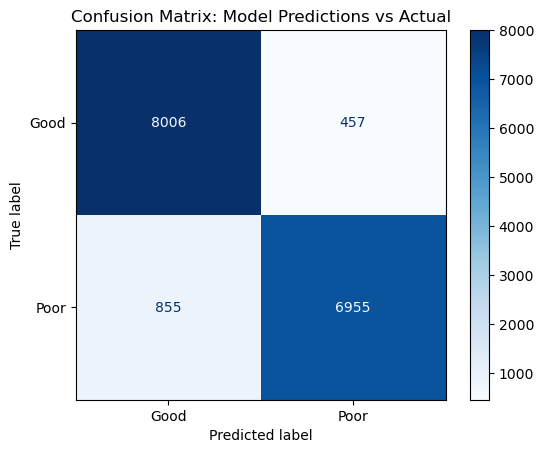

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 3: Generate confusion matrix comparing actual labels to predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Display the confusion matrix
class_names = ["Good", "Poor"]
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
display.plot(cmap='Blues')

# Add title and show plot
display.ax_.set_title("Confusion Matrix: Model Predictions vs Actual")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [29]:
 # Instantiate the classifier
nb_classifier = MultinomialNB()

# Fit the model
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [31]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8463
           1       0.92      0.86      0.89      7810

    accuracy                           0.90     16273
   macro avg       0.90      0.89      0.89     16273
weighted avg       0.90      0.90      0.90     16273

Accuracy: 0.8954710256252688


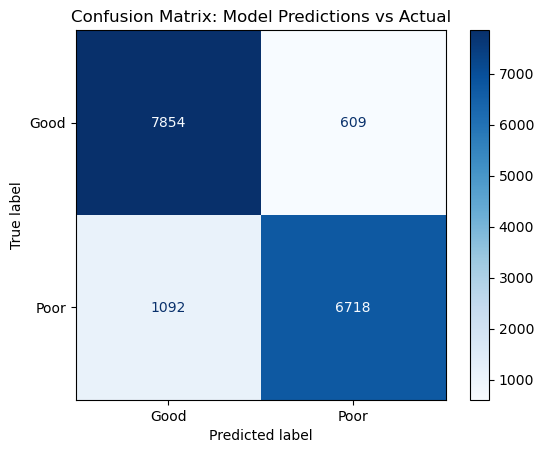

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 3: Generate confusion matrix comparing actual labels to predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Display the confusion matrix
class_names = ["Good", "Poor"]
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
display.plot(cmap='Blues')

# Add title and show plot
display.ax_.set_title("Confusion Matrix: Model Predictions vs Actual")
plt.show()

### Result:

**Accuracy Comparison:**

* Logistic Regression has a higher accuracy score (97.41%) compared to Multinomial Naive Bayes (89.55%). This indicates that Logistic Regression performs better overall on the classification task.

**Precision:**

* For Class 0 (Good Credit Score), both models are quite similar in performance, but Logistic Regression has a slightly higher precision (0.90 vs. 0.88).
* For Class 1 (Poor Credit Score), Logistic Regression again outperforms Naive Bayes with a precision of 0.94, compared to 0.92 for Naive Bayes.

**Recall:**

* Logistic Regression has a higher recall for Class 0 (Good Credit Score) (0.95 vs. 0.93), meaning it correctly identifies a larger proportion of the actual "Good Credit Score" instances.
* For Class 1 (Poor Credit Score), Logistic Regression has a higher recall (0.86 vs. 0.89), indicating it captures more of the "Poor Credit Score" instances.

**F1-Score:**

* Logistic Regression has higher F1-scores across both classes, with 0.92 for Class 0 and 0.91 for Class 1, indicating a more balanced performance in both precision and recall.
* Naive Bayes has F1-scores of 0.90 for Class 0 and 0.89 for Class 1, showing it is slightly less effective in balancing precision and recall, especially for Class 1.

**Confusion Matrices:**

* Logistic Regression has fewer false positives (855 vs. 1092 for Naive Bayes) and fewer false negatives (457 vs. 609 for Naive Bayes). This suggests that Logistic Regression is better at distinguishing between the two classes.
* Naive Bayes, on the other hand, has more misclassifications for both classes, particularly for Class 1 where it has a significantly higher number of false negatives (457 vs. 609).

### Conclusion:

* Logistic Regression is clearly the better-performing model based on these metrics, with a significantly higher accuracy and better precision, recall, and F1-score.
* Multinomial Naive Bayes performs reasonably well but is slightly weaker in capturing true positives and avoiding false negatives. It might be more sensitive to the data distribution or feature correlations in this specific dataset.